In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import ast

In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Jobstreet/Jobstreet-musician.csv",
   "../../Raw_CSV/April 27 - 2022/Jobstreet/Jobstreet-musician.csv",
    "../../Raw_CSV/April 28 - 2022/Jobstreet/Jobstreet-musician.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Salary"].str.strip()
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,Social and Digital Content Producer,Asticom Technology Inc,National Capital Reg,"ideography of experiential, social media and e...",None,"['ideography of experiential, social media and...",[],"['25 Full-Time position(s) available.', 'Full-...","[""RESPONSIBILITIES INCLUDE:ideography of exper...",1-4 Years Experienced Employee,"['Dental, Education support, Miscellaneous all...",2001 - 5000 Employees
1,Personal driver,Paramount Human Resource Multi Purpose Coopera...,Quezon,Fetching and welcoming clients at the beginnin...,None,['Fetching and welcoming clients at the beginn...,['Personal Driver Requirements:'],"['Full-Time', 'Average Processing Time']","[""Fetching and welcoming clients at the beginn...",1-4 Years Experienced Employee,[],201 - 500 Employees
2,Full-Stack Developer,"MedSpecialized, Inc.",Cebu (Cebu City),Perform web application development and mainte...,"PHP 23,000 - PHP 35,000",['Perform web application development and main...,"['MedSpecialized, Inc. is looking for a Full-S...","['Full-Time', 'Average Processing Time']","['MedSpecialized, Inc. is looking for a Full-S...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Sp...",201 - 500 Employees
3,Multimedia Producer,"MedSpecialized, Inc.",Cebu (Cebu City),Listens to feedback and adjusts the video draf...,"PHP 16,000 - PHP 18,000",['Listens to feedback and adjusts the video dr...,"['MedSpecialized, Inc. is looking for Multimed...","['Full-Time', 'Average Processing Time']","['MedSpecialized, Inc. is looking for Multimed...",Less than 1 Year Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Sp...",201 - 500 Employees
4,Web/Graphic Designer,"MedSpecialized, Inc.",Cebu (Cebu City),This Job includes the entire process of defini...,"PHP 16,000 - PHP 22,000",['This Job includes the entire process of defi...,"['MedSpecialized, Inc. is looking for a Web/Gr...","['Full-Time', 'Average Processing Time']","['MedSpecialized, Inc. is looking for a Web/Gr...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Sp...",201 - 500 Employees
...,...,...,...,...,...,...,...,...,...,...,...,...
279,PR Associate,ABS-CBN Corporation,Quezon,Works with PR Accounts Heads or PR Accounts Of...,None,['Works with PR Accounts Heads or PR Accounts ...,"[""ABS-CBN Corporation is the Philippines' lead...",[],"[""BUSINESS SUMMARYABS-CBN Corporation is the P...",NaN,"['Medical, Regular hours, Mondays - Fridays, -']",2001 - 5000 Employees
280,Learning and Talent Development Lead,ABS-CBN Corporation,Quezon,Facilitates corporate activities/exercises to ...,None,['Facilitates corporate activities/exercises t...,"[""ABS-CBN Corporation is the Philippines' lead...",[],"[""BUSINESS SUMMARYABS-CBN Corporation is the P...",NaN,"['Medical, Regular hours, Mondays - Fridays, -']",2001 - 5000 Employees
281,Multimedia Artists,YONDU INC.,Taguig City,Education – At least graduate with a Bachelor...,None,['Education – \xa0At least graduate with a Bac...,[],['Average Processing Time'],['Education – \xa0At least graduate with a Bac...,NaN,"['Dental, Miscellaneous allowance, Medical, Lo...",501 - 1000 Employees
282,Vlog Editor,Tier One Entertainment Corp.,Philippines,Manipulating and editing film pieces in a way ...,None,['Manipulating and editing film pieces in a wa...,['Tier O\ufeffne Entertainment was founded in ...,['Full-Time'],"[""Tier O\ufeffne Entertainment was founded in ...",NaN,[],NaN


In [3]:
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,Social and Digital Content Producer,Asticom Technology Inc,National Capital Reg,"ideography of experiential, social media and e...",None,"['ideography of experiential, social media and...",[],"['25 Full-Time position(s) available.', 'Full-...","[""RESPONSIBILITIES INCLUDE:ideography of exper...",1-4 Years Experienced Employee,"['Dental, Education support, Miscellaneous all...",2001 - 5000 Employees
1,Personal driver,Paramount Human Resource Multi Purpose Coopera...,Quezon,Fetching and welcoming clients at the beginnin...,None,['Fetching and welcoming clients at the beginn...,['Personal Driver Requirements:'],"['Full-Time', 'Average Processing Time']","[""Fetching and welcoming clients at the beginn...",1-4 Years Experienced Employee,[],201 - 500 Employees
2,Full-Stack Developer,"MedSpecialized, Inc.",Cebu (Cebu City),Perform web application development and mainte...,"PHP 23,000 - PHP 35,000",['Perform web application development and main...,"['MedSpecialized, Inc. is looking for a Full-S...","['Full-Time', 'Average Processing Time']","['MedSpecialized, Inc. is looking for a Full-S...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Sp...",201 - 500 Employees
3,Multimedia Producer,"MedSpecialized, Inc.",Cebu (Cebu City),Listens to feedback and adjusts the video draf...,"PHP 16,000 - PHP 18,000",['Listens to feedback and adjusts the video dr...,"['MedSpecialized, Inc. is looking for Multimed...","['Full-Time', 'Average Processing Time']","['MedSpecialized, Inc. is looking for Multimed...",Less than 1 Year Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Sp...",201 - 500 Employees
4,Web/Graphic Designer,"MedSpecialized, Inc.",Cebu (Cebu City),This Job includes the entire process of defini...,"PHP 16,000 - PHP 22,000",['This Job includes the entire process of defi...,"['MedSpecialized, Inc. is looking for a Web/Gr...","['Full-Time', 'Average Processing Time']","['MedSpecialized, Inc. is looking for a Web/Gr...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Sp...",201 - 500 Employees
...,...,...,...,...,...,...,...,...,...,...,...,...
279,PR Associate,ABS-CBN Corporation,Quezon,Works with PR Accounts Heads or PR Accounts Of...,None,['Works with PR Accounts Heads or PR Accounts ...,"[""ABS-CBN Corporation is the Philippines' lead...",[],"[""BUSINESS SUMMARYABS-CBN Corporation is the P...",NaN,"['Medical, Regular hours, Mondays - Fridays, -']",2001 - 5000 Employees
280,Learning and Talent Development Lead,ABS-CBN Corporation,Quezon,Facilitates corporate activities/exercises to ...,None,['Facilitates corporate activities/exercises t...,"[""ABS-CBN Corporation is the Philippines' lead...",[],"[""BUSINESS SUMMARYABS-CBN Corporation is the P...",NaN,"['Medical, Regular hours, Mondays - Fridays, -']",2001 - 5000 Employees
281,Multimedia Artists,YONDU INC.,Taguig City,Education – At least graduate with a Bachelor...,None,['Education – \xa0At least graduate with a Bac...,[],['Average Processing Time'],['Education – \xa0At least graduate with a Bac...,NaN,"['Dental, Miscellaneous allowance, Medical, Lo...",501 - 1000 Employees
282,Vlog Editor,Tier One Entertainment Corp.,Philippines,Manipulating and editing film pieces in a way ...,None,['Manipulating and editing film pieces in a wa...,['Tier O\ufeffne Entertainment was founded in ...,['Full-Time'],"[""Tier O\ufeffne Entertainment was founded in ...",NaN,[],NaN


In [4]:
merge.describe()

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
count,284,284,284,284,284,284,284,284,284,266,284,263
unique,91,58,23,63,40,73,53,15,100,3,42,7
top,Video Editor,"MedSpecialized, Inc.",National Capital Reg,None,None,[],[],"['Full-Time', 'Average Processing Time']","[""Level up your Customer Care skills when you ...",1-4 Years Experienced Employee,[],201 - 500 Employees
freq,16,78,71,81,138,81,136,149,11,177,67,96


In [5]:
job_title_lower = merge["Title"].str.lower()

In [6]:
job_title = job_title_lower.value_counts()[0:10]

In [7]:
job_title

video editor                                                            22
music app specialist | taskus batangas                                  11
video editor | work from home                                            9
social and digital content producer                                      8
open broadcaster system software specialist                              8
event specialist                                                         7
multimedia producer                                                      6
motion graphics designer (mid- senior level) - night shift, temp wfh     6
executive assistant                                                      6
cloud phone project manager | temporary work from home | up to 23k       5
Name: Title, dtype: int64

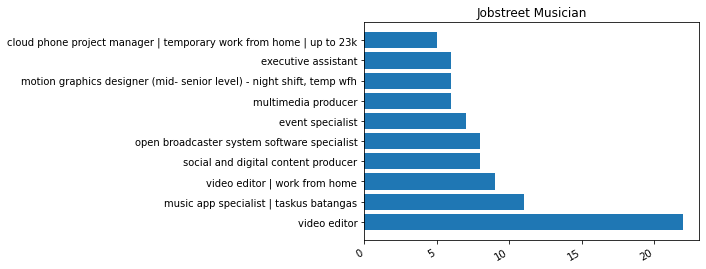

In [8]:
plt.barh(job_title.index, job_title.values)
plt.title("Jobstreet Musician")
plt.xticks(rotation="30", ha="right")
plt.show()

In [9]:
company_name = merge["Company"].value_counts()[0:10]

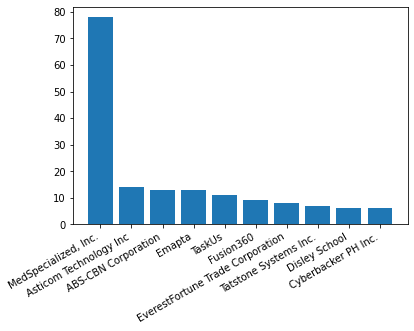

In [10]:
plt.bar(company_name.index, company_name.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [11]:
company_location = merge["Location"].value_counts()[0:10]

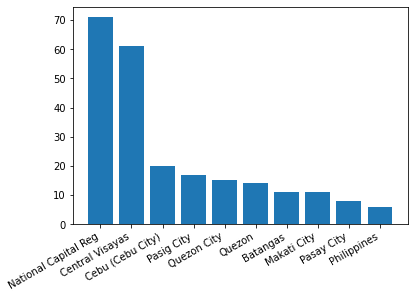

In [12]:
plt.bar(company_location.index, company_location.values)
plt.xticks(rotation="30", ha="right")
plt.show()


In [13]:
filt = (merge["Salary"] != "None")
results = merge.loc[filt]

In [14]:
salary = results["Salary"].value_counts()[0:10]

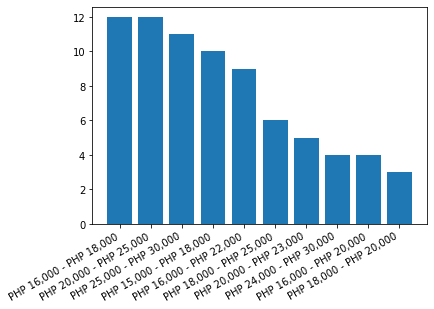

In [15]:
plt.bar(salary.index, salary.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [16]:
job_type = merge["Job Type"].apply(ast.literal_eval)
job_type_append = []
for i in job_type:
    job_type_append.append(job_type[0][0])

In [17]:
# List to Dataframe ( Count Job Type )
job_type_df = pd.DataFrame(job_type_append,columns=["Job Type"])
job_type_df.value_counts()


Job Type                           
25 Full-Time position(s) available.    284
dtype: int64

In [18]:
career_level = merge["Career Level"]
count_career_level = career_level.value_counts()
count_career_level

1-4 Years Experienced Employee                  177
Less than 1 Year Experienced Employee            68
Supervisor/5 Years & Up Experienced Employee     21
Name: Career Level, dtype: int64

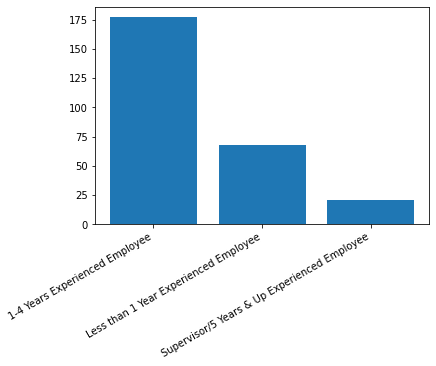

In [19]:
plt.bar(count_career_level.index, count_career_level.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [20]:
company_size = merge["Company Size"]
count_company_size = company_size.value_counts()[0:6]
count_company_size

201 - 500 Employees      96
51 - 200 Employees       56
2001 - 5000 Employees    40
1 - 50 Employees         33
None                     18
501 - 1000 Employees     16
Name: Company Size, dtype: int64

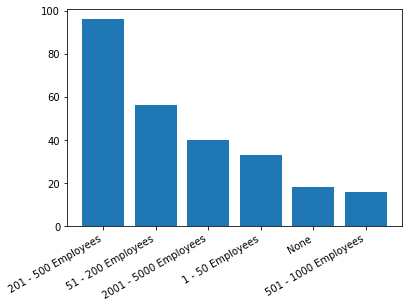

In [21]:
plt.bar(count_company_size.index, count_company_size.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [22]:
benefits = merge["Benefits"].str.replace("^\['|'\]$","")
benefits_append = []
split_benefits = benefits.str.split(",")

for i in range(len(split_benefits)):
    for j in split_benefits[i]:
        benefits_append.append(j)


/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_3684/2971443327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  benefits = merge["Benefits"].str.replace("^\['|'\]$","")


In [23]:
benefits_df = pd.DataFrame(benefits_append, columns=["Benefits"])
benefits_df = benefits_df["Benefits"].str.strip()
filt = (benefits_df != "[]")
benefits_df = benefits_df.loc[filt]
benefits_count = benefits_df.value_counts()[0:15]
benefits_count



Medical                                   209
Miscellaneous allowance                   157
Dental                                    146
Casual (e.g. T-shirts)                    119
Sports (e.g. Gym)                         102
Vision                                     99
Parking                                    87
lunch/dinner                               78
incentives                                 78
Day or Night Shift (Depending on Role)     78
unlimited ice cream and coffee             78
Loans                                      54
Regular hours                              54
Mondays - Fridays                          51
Business (e.g. Shirts)                     41
Name: Benefits, dtype: int64

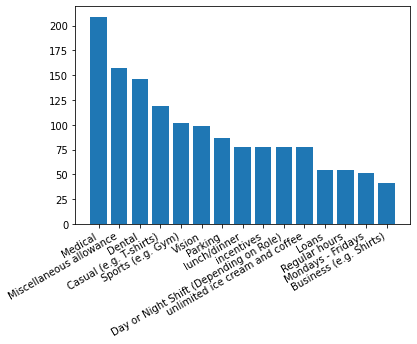

In [24]:
plt.bar(benefits_count.index, benefits_count.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [25]:
filt = (merge["Salary"] != "None")
salary_career_level = merge[filt].sort_values(by="Salary",ascending=True)
count = salary_career_level[["Title","Salary","Career Level"]]



In [26]:
merge["Career Level"].value_counts()

1-4 Years Experienced Employee                  177
Less than 1 Year Experienced Employee            68
Supervisor/5 Years & Up Experienced Employee     21
Name: Career Level, dtype: int64

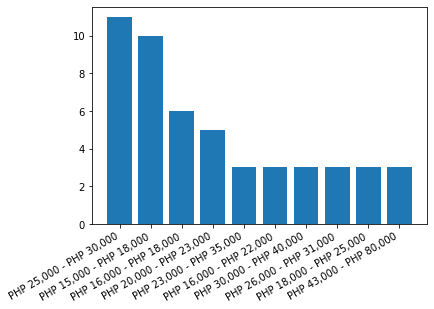

In [27]:
mid_level = merge.loc[merge["Career Level"] == "1-4 Years Experienced Employee"]
mid_level_salary = mid_level[mid_level["Salary"] != "None"]
count_mid = mid_level_salary["Salary"].value_counts()[0:10]
plt.bar(count_mid.index, count_mid.values)
plt.xticks(rotation="30",ha="right")
plt.show()

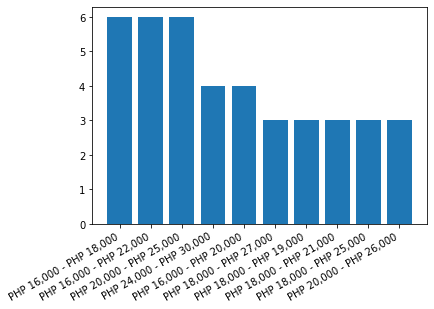

In [28]:
low_level = merge.loc[merge["Career Level"] == "Less than 1 Year Experienced Employee"]
low_level_salary = low_level[low_level["Salary"] != "None"]
count_low = low_level_salary["Salary"].value_counts()[0:10]

plt.bar(count_low.index, count_low.values)
plt.xticks(rotation="30",ha="right")
plt.show()

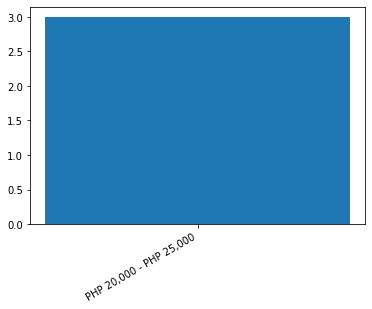

In [29]:
high_level = merge.loc[merge["Career Level"] == "Supervisor/5 Years & Up Experienced Employee"]
high_level_salary = high_level[high_level["Salary"] != "None"]
count_high = high_level_salary["Salary"].value_counts()[0:10]
plt.bar(count_high.index, count_high.values)
plt.xticks(rotation="30",ha="right")
plt.show()